# EXPLORATORY DATA ANALYSIS ON OLYMPICS DATASET

OLYMPIC GAMES ANALYSIS – EXPLORING TRENDS, MEDALS, ATHLETES, AND MORE.

**Project Overview**

In this Exploratory Data Analysis (EDA), we dive deep into the Olympics dataset to uncover patterns, trends, and insights related to athletes' demographics, medal distributions, country-wise performance, participation growth, and much more. From identifying top-performing nations to analyzing how host countries fare, this analysis provides a comprehensive view of the Olympic legacy through the lens of data.

--------------------------------------------

## Olympic Games Dataset - Overview
This dataset contains historical data on athletes who participated in the Olympic Games from 1896 to 2016. It includes information such as:
- Athlete demographics (Name, Sex, Age, Height, Weight)
- Olympic participation details (Team, NOC, Year, City, Event)
- Medals won (Gold, Silver, Bronze)
 The goal of this Exploratory Data Analysis (EDA) is to uncover insights from the Olympics dataset.
 We aim to understand athlete demographics, country performances, sport-specific patterns, and Olympic trends.
 This analysis can guide decision-making for sports organizations and analytics professionals.




 -----------------------------------------
### Workflow Overview

#### 1. Data Cleaning  
- Handle missing values and duplicates  
- Normalize and standardize data for analysis  

#### 2. Exploratory Data Analysis (EDA) Objectives  
- General analysis of athletes and events  
- Country-wise Olympic performance trends  
- Athlete demographics and physical attributes  
- Medal distribution patterns and anomalies  
- Year-wise Olympic participation trends  
- Sport-specific insights and diversity analysis  
- Outlier detection and correlation study  

#### 3. Data Visualization  
- Use of heatmaps, bar plots, box plots, violin plots, pair plots  
- Identify hidden patterns, trends, and outliers  


**Imported Required Libraries**


In [2]:
import pandas as pd
import numpy as np  # For numerical operation
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced visualizations

📅 Daily Log and Progress Tracker
✅ Day 1 - 2025-03-31
Imported dataset athlete_events.csv
Displayed basic info using df.info(), df.describe()
Checked for missing values using df.isnull().sum()

**Loading the Dataset**


In [3]:
#Loading the Dataset
df=pd.read_csv(r'C:\Users\asus\Downloads\dataset_olympic.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**Data Overview**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


**Summary statistics for numerical columns**


In [57]:
df.describe()

,ID,Age,Height,Weight,Year
count,69617.000000,69617.000000,69527.000000,69527.000000,69617.000000
mean,18073.006378,25.585636,175.468148,71.023497,1978.021862
std,10240.599374,6.215296,9.509864,12.917382,29.982224
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9303.000000,22.000000,170.000000,63.000000,1960.000000
50%,18029.000000,25.000000,176.000000,70.000000,1984.000000
75%,26965.000000,28.000000,181.000000,78.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [6]:
# Count missing values in each column
df.isnull().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

### **Data Cleaning and Handling misssing values**


In [84]:
df['Medal'] = df['Medal'].fillna('No Medal')
for col in ['Age', 'Height', 'Weight']:
    df[col] = df.groupby('Sport')[col].transform(lambda x: x.fillna(x.mean()))

for col in ['Age', 'Height', 'Weight']:
    df[col] = df[col].fillna(df[col].mean())


In [67]:
print(df[['Height', 'Weight']].isnull().sum())

Height    0
Weight    0
dtype: int64


In [10]:
df.duplicated().sum()

np.int64(383)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
print(df.columns)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


### **General Analysis of Athletes and Events**

**1. Determine the total number of unique athletes, sports, and events**

In [14]:
print("\nGeneral Statistics")
print(f"Total Unique Athletes: {df['Name'].nunique()}")
print(f"Total Unique Sports: {df['Sport'].nunique()}")
print(f"Total Unique Events: {df['Event'].nunique()}")


General Statistics
Total Unique Athletes: 35556
Total Unique Sports: 65
Total Unique Events: 744


**2. Identify the most common sports and events in the Olympics.**

In [15]:
print("Most common sports:\n",df['Sport'].value_counts().head(10)) 

Most common sports:
 Sport
Athletics               10629
Gymnastics               6248
Swimming                 5964
Fencing                  3096
Shooting                 3040
Cycling                  2788
Rowing                   2690
Alpine Skiing            2326
Cross Country Skiing     2153
Football                 1959
Name: count, dtype: int64


In [16]:
print("Most common events:\n",df['Event'].value_counts().head(10)) 

Most common events:
 Event
Football Men's Football                   1738
Hockey Men's Hockey                       1133
Ice Hockey Men's Ice Hockey               1009
Basketball Men's Basketball                921
Water Polo Men's Water Polo                911
Cycling Men's Road Race, Individual        737
Rowing Men's Coxed Eights                  648
Athletics Men's 4 x 100 metres Relay       591
Athletics Men's 100 metres                 585
Gymnastics Men's Individual All-Around     583
Name: count, dtype: int64


**3. Count of medals won by each country (NOC)**


In [17]:
medal_counts = df.groupby('NOC')['Medal'].count().sort_values(ascending=False)
print(medal_counts)


NOC
USA    5133
FRA    4826
ITA    4163
GBR    3491
CAN    2662
       ... 
BUR       1
KIR       1
TUV       1
UNK       1
YMD       1
Name: Medal, Length: 226, dtype: int64


**4. Analyze the top-performing countries based on the total medal count.**

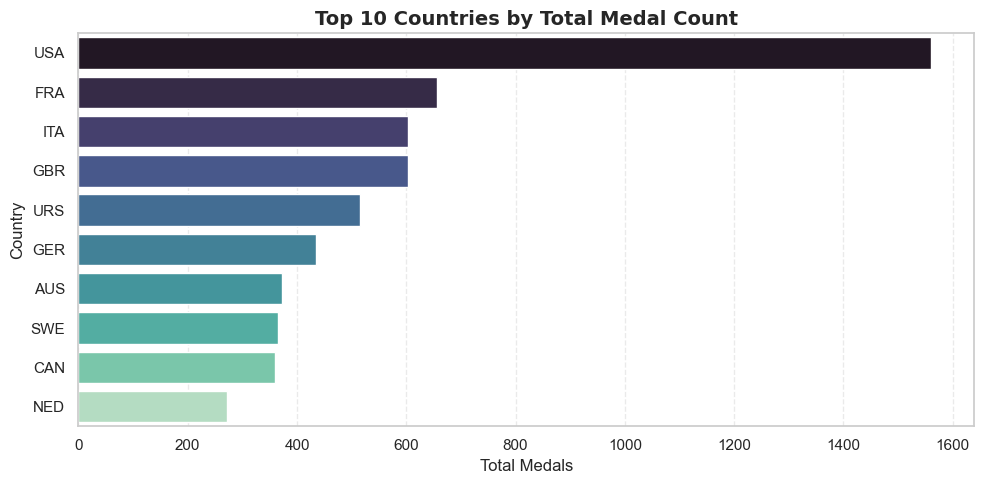

In [45]:
medals_df = df[df['Medal'] != 'No Medal']
country_medals = medals_df.groupby('NOC')['Medal'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(
    x=country_medals.values,
    y=country_medals.index,
    hue=country_medals.index,
    dodge=False,
    legend=False,
    palette="mako"
)
plt.title('Top 10 Countries by Total Medal Count', fontsize=14, weight='bold', fontname='DejaVu Sans')
plt.xlabel('Total Medals', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


**5. Compare the performance of countries across different Olympic years.**

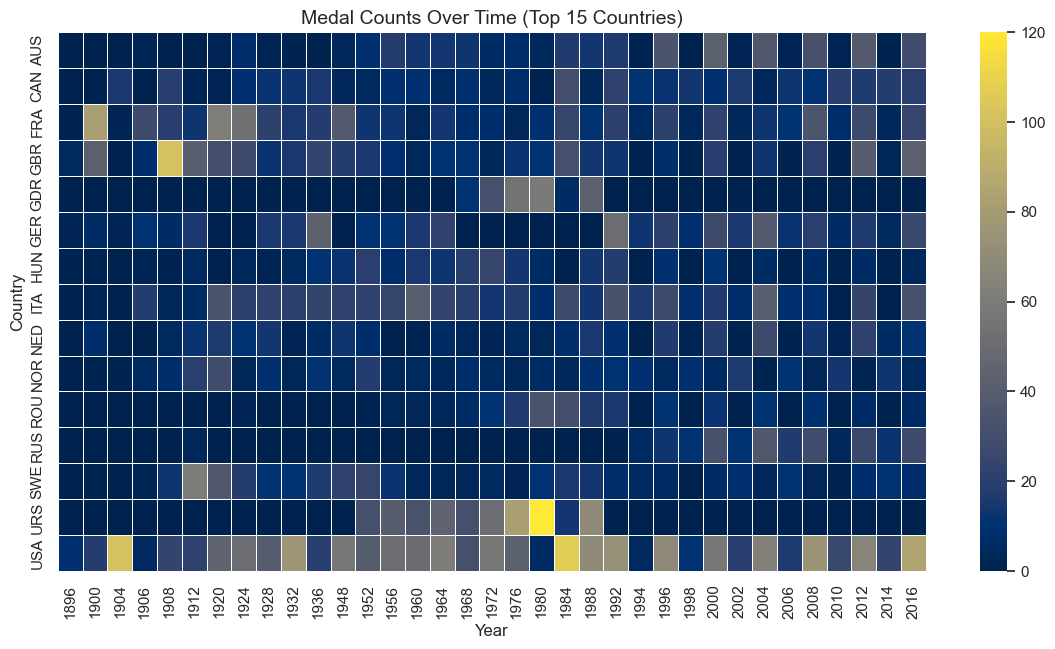

In [68]:
top_countries = medals_df['NOC'].value_counts().head(15).index
filtered_df = medals_df[medals_df['NOC'].isin(top_countries)]
country_year = filtered_df.groupby(['Year', 'NOC'])['Medal'].count().unstack().fillna(0)
plt.figure(figsize=(14, 7))
sns.heatmap(country_year.T, cmap='cividis', linewidths=0.5, linecolor='white')
plt.title('Medal Counts Over Time (Top 15 Countries)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()


### 6. **Impact of Hosting Country**



In [ ]:
host_mapping = {
    'London': 'Great Britain',
    'Beijing': 'China',
    'Athens': 'Greece',
    'Rio de Janeiro': 'Brazil',
    'Tokyo': 'Japan',
    'Sydney': 'Australia',
    'Atlanta': 'United States',
    'Los Angeles': 'United States',
    'Barcelona': 'Spain',
    'Seoul': 'South Korea',
    'Munich': 'Germany',
    'Moscow': 'Russia',
    'Mexico City': 'Mexico'
}
medal_df = df[df['Medal'].notna()]
host_results = []
for city, country in host_mapping.items():
    years_hosted = df[df['City'] == city]['Year'].unique()
    for year in years_hosted:
        medals_won = medal_df[(medal_df['Team'] == country) & (medal_df['Year'] == year)].shape[0]
        host_results.append({
            'Country': country,
            'City': city,
            'Year': year,
            'Medals_in_Host_Year': medals_won
        })
host_df = pd.DataFrame(host_results)
host_df.sort_values(by='Medals_in_Host_Year', ascending=False, inplace=True)
print(host_df)


          Country            City  Year  Medals_in_Host_Year
2   Great Britain          London  1908                  233
9   United States     Los Angeles  1984                  229
4          Brazil  Rio de Janeiro  2016                  226
7   United States         Atlanta  1996                  220
10          Spain       Barcelona  1992                  200
6       Australia          Sydney  2000                  191
8   United States     Los Angeles  1932                  179
0   Great Britain          London  2012                  164
1   Great Britain          London  1948                  161
13         Mexico     Mexico City  1968                  127
3           China         Beijing  2008                   89
11    South Korea           Seoul  1988                   54
5           Japan           Tokyo  1964                   38
12        Germany          Munich  1972                    0


### **7. Number of athletes in Summer vs. Winter Olympics**


In [ ]:
season_comparison = df.groupby("Season")["ID"].nunique()
print(season_comparison)

Season
Summer    31209
Winter     4486
Name: ID, dtype: int64


### **8. Find the average age, height, and weight of athletes across different sports.**

In [ ]:
age_analysis = df.groupby("Sport")["Age"].mean().sort_values()
print(age_analysis.head(10))

Sport
Rhythmic Gymnastics          18.557692
Swimming                     20.525409
Synchronized Swimming        22.121569
Racquets                     22.333333
Diving                       22.377778
Figure Skating               22.402397
Gymnastics                   22.574747
Boxing                       22.908216
Short Track Speed Skating    22.910112
Alpine Skiing                23.099740
Name: Age, dtype: float64


In [69]:
df.groupby('Sport')[['Age', 'Height', 'Weight']].mean().sort_values(by='Age', ascending=False)

,Age,Height,Weight
Sport,,,
Art Competitions,44.915546,180.726026,86.000000
Alpinism,40.666667,175.468148,71.023497
Roque,37.000000,175.468148,71.023497
Jeu De Paume,36.000000,175.468148,71.023497
Polo,35.388889,175.468148,71.023497
...,...,...,...
Diving,22.377778,166.197441,60.486590
Racquets,22.333333,175.468148,71.023497
Synchronized Swimming,22.121569,167.721311,55.799163


### **9.find sports with youngest and oldest participants**

In [70]:
 #Find sports with youngest and oldest participants
youngest = df.groupby('Sport')['Age'].min().sort_values().head()
oldest = df.groupby('Sport')['Age'].max().sort_values(ascending=False).head()
print("\n--- Youngest Sports ---")
print(youngest)
print("\n--- Oldest Sports ---")
print(oldest)


--- Youngest Sports ---
Sport
Figure Skating    11.0
Rowing            12.0
Swimming          12.0
Diving            13.0
Gymnastics        13.0
Name: Age, dtype: float64

--- Oldest Sports ---
Sport
Art Competitions    88.0
Equestrianism       69.0
Archery             68.0
Shooting            65.0
Sailing             61.0
Name: Age, dtype: float64


### 10. **Identify age trends: What is the most common age range for Olympic athletes?**

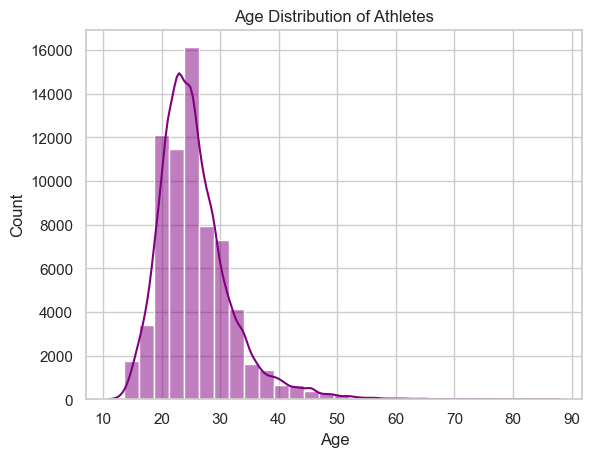

In [72]:

sns.histplot(df['Age'], bins=30, kde=True,color="purple")
plt.title("Age Distribution of Athletes")
plt.show()

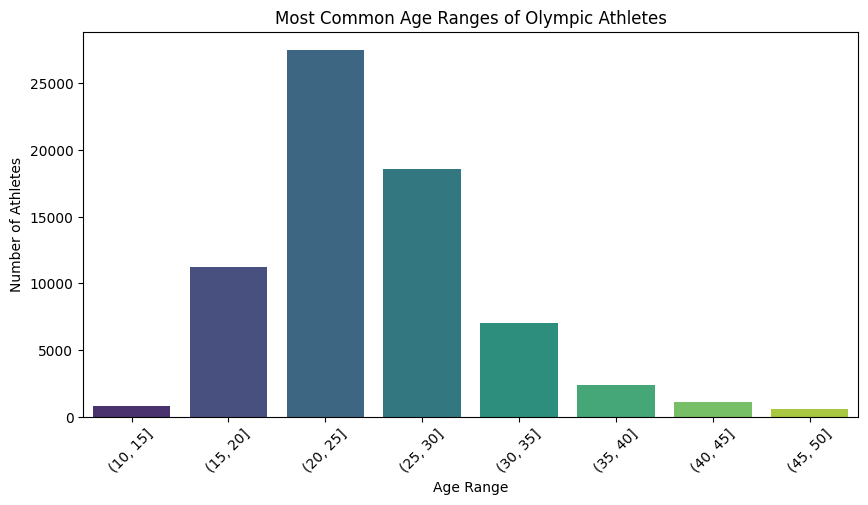


--- Most Common Age Range ---
The most common age range is: (20, 25]


In [27]:
age_bins = pd.cut(df['Age'], bins=[10, 15, 20, 25, 30, 35, 40, 45, 50])
age_range_counts = age_bins.value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=age_range_counts.index.astype(str), y=age_range_counts.values, hue=age_range_counts.index.astype(str), legend=False, palette='viridis')

plt.title('Most Common Age Ranges of Olympic Athletes')
plt.xlabel('Age Range')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.show()

print("\n--- Most Common Age Range ---")
most_common_range = age_range_counts.idxmax()
print(f"The most common age range is: {most_common_range}")


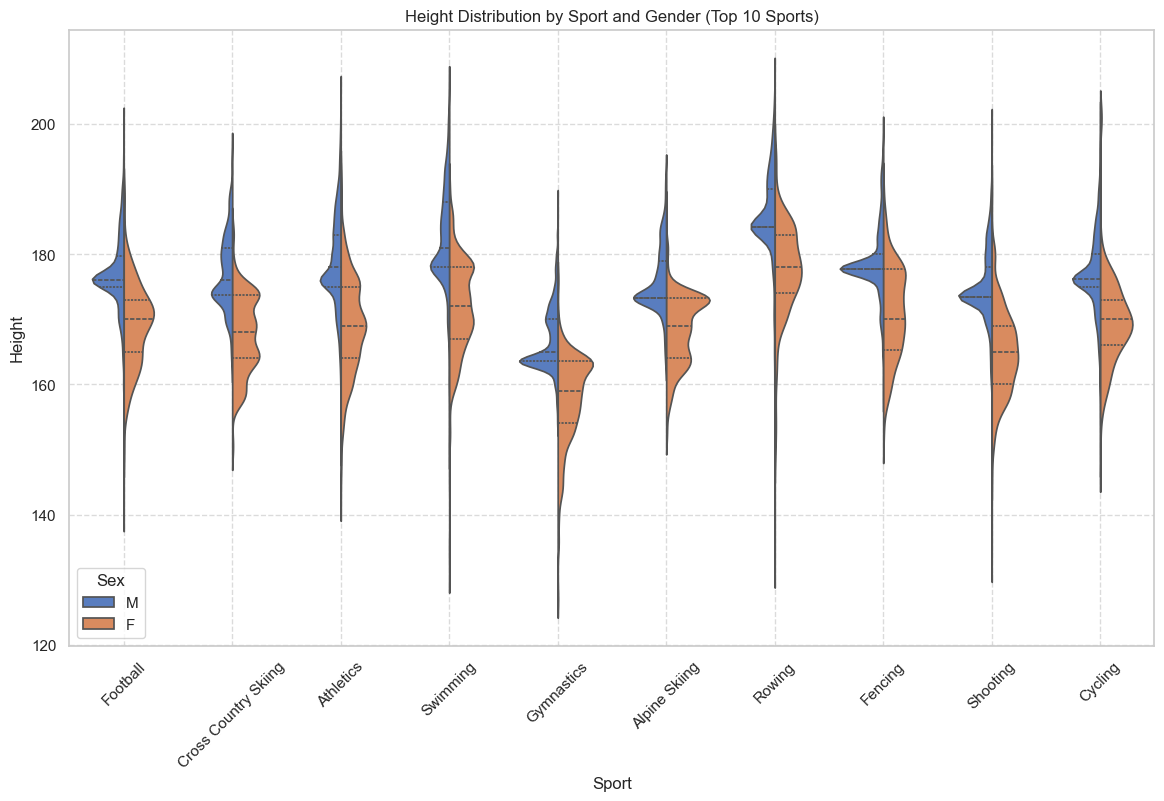

In [ ]:
top_sports = df['Sport'].value_counts().head(10).index
filtered_df = df[df['Sport'].isin(top_sports)]
plt.figure(figsize=(14,8))
sns.violinplot(x='Sport', y='Height', hue='Sex', data=filtered_df, split=True, inner='quart', palette='muted')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.title('Height Distribution by Sport and Gender (Top 10 Sports)')
plt.show()


**11. Analyze the gender ratio of athletes in the Olympics over the years.**

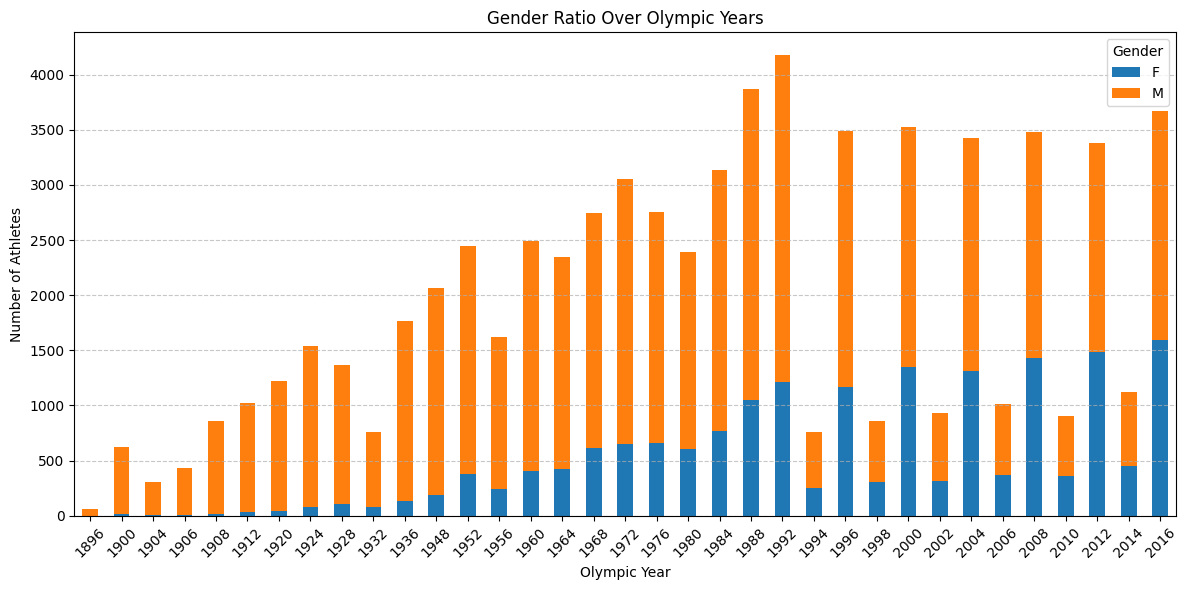

In [29]:
gender_count = df.groupby(['Year', 'Sex']).size().unstack()
gender_count.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Gender Ratio Over Olympic Years")
plt.xlabel("Olympic Year")
plt.ylabel("Number of Athletes")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**12. Count number of Male and Female athletes per sport**

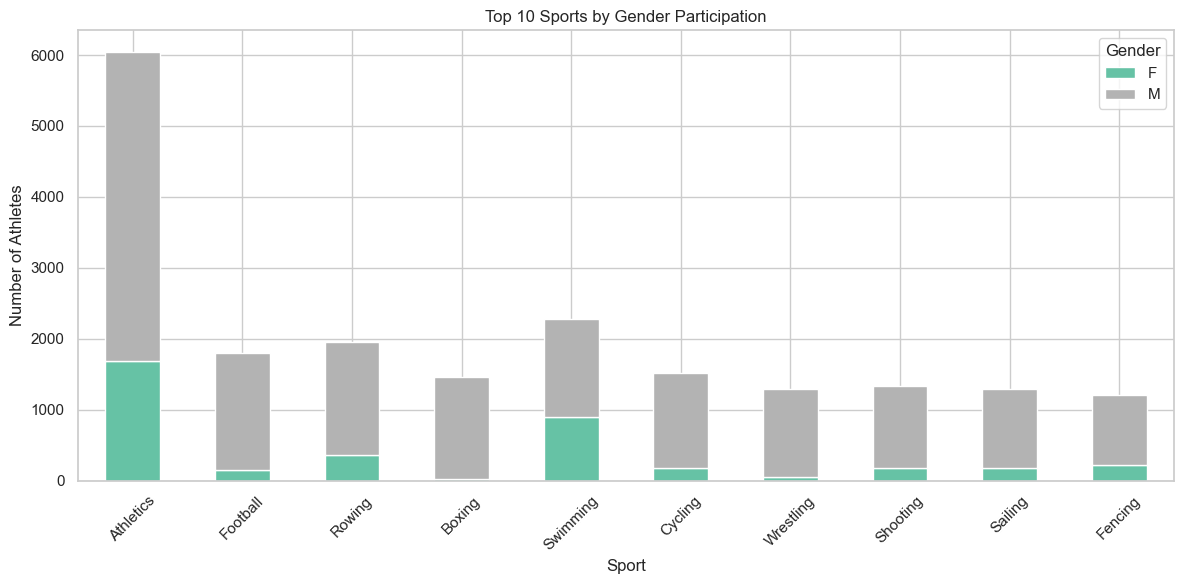

In [75]:
gender_sport = df.groupby(['Sport', 'Sex'])['ID'].nunique().unstack().fillna(0)
gender_sport.sort_values(by=['M', 'F'], ascending=False).head(10).plot(
    kind='bar', figsize=(12,6), stacked=True, colormap='Set2'
)
plt.title('Top 10 Sports by Gender Participation')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.legend(title='Gender')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


### **13. Count how many times top athletes won a medal**

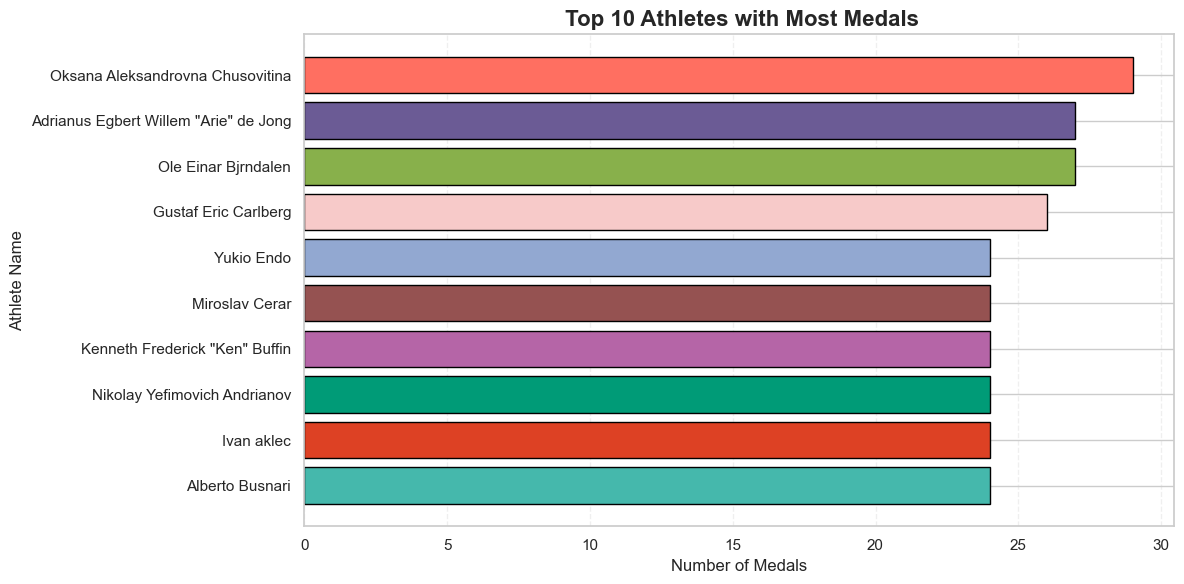

In [86]:
medal_winners = df[df['Medal'].notna()]

top_athletes = medal_winners['Name'].value_counts().head(10)
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1',
          '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC']
plt.figure(figsize=(12, 6))
plt.barh(top_athletes.index, top_athletes.values, color=colors, edgecolor='black')

plt.title(" Top 10 Athletes with Most Medals", fontsize=16, weight='bold')
plt.xlabel("Number of Medals", fontsize=12)
plt.ylabel("Athlete Name", fontsize=12)
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



### **14. Count how many times top athletes won a medal**


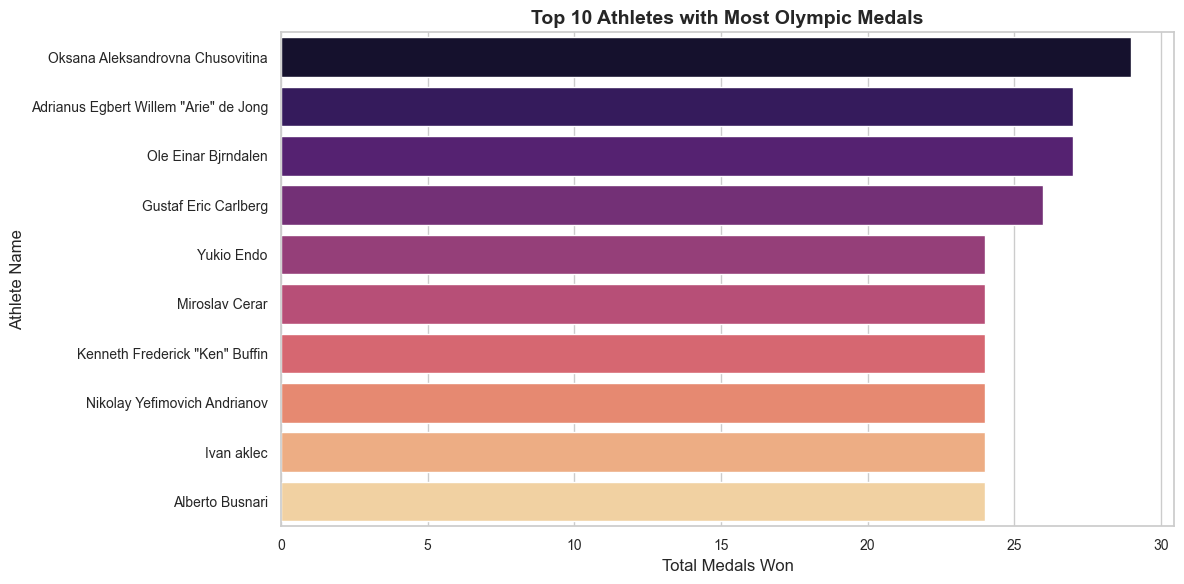

In [ ]:

medal_winners = df[df['Medal'].notna()]

top_athletes = medal_winners['Name'].value_counts().head(10).reset_index()
top_athletes.columns = ['Name', 'Medal Count']
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(data=top_athletes, y='Name', x='Medal Count', hue='Name', palette='magma', dodge=False)
plt.legend([],[], frameon=False)  # Hide the legend

plt.title("Top 10 Athletes with Most Olympic Medals", fontsize=14, weight='bold')
plt.xlabel("Total Medals Won", fontsize=12)
plt.ylabel("Athlete Name", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


  ### **15. Which Cities Hosted the Olympics the Most**



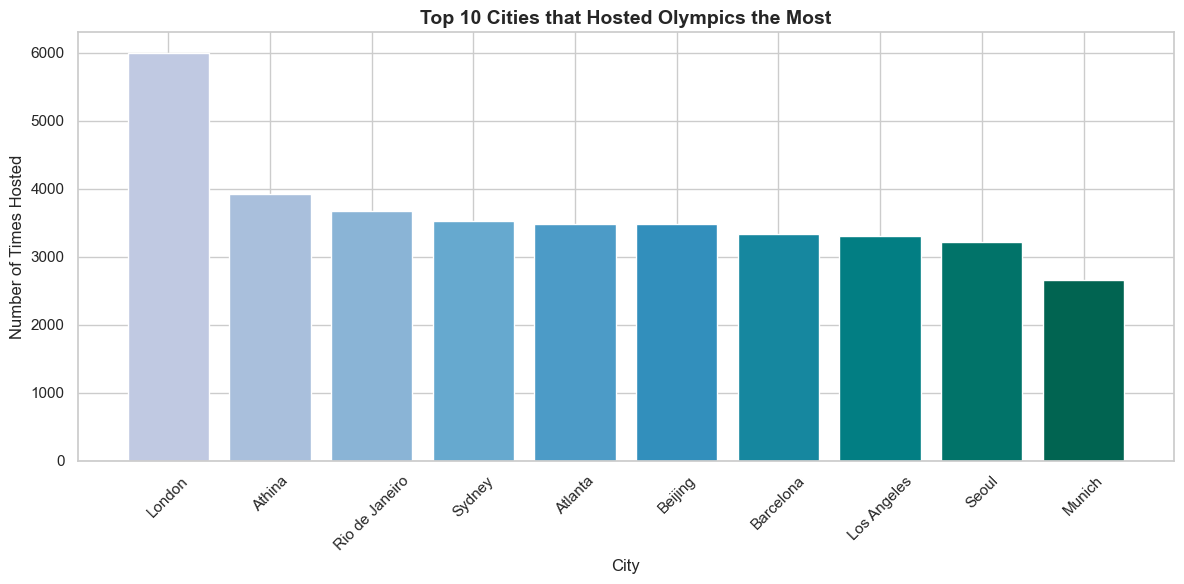

In [33]:
plt.figure(figsize=(12, 6))
city_counts = df['City'].value_counts().head(10)

colors = plt.cm.PuBuGn(np.linspace(0.3, 0.9, 10))
plt.bar(city_counts.index, city_counts.values, color=colors)
plt.title("Top 10 Cities that Hosted Olympics the Most", fontsize=14, weight='bold')
plt.xlabel("City")
plt.ylabel("Number of Times Hosted")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **16. Total olympic medals won by India over the years**

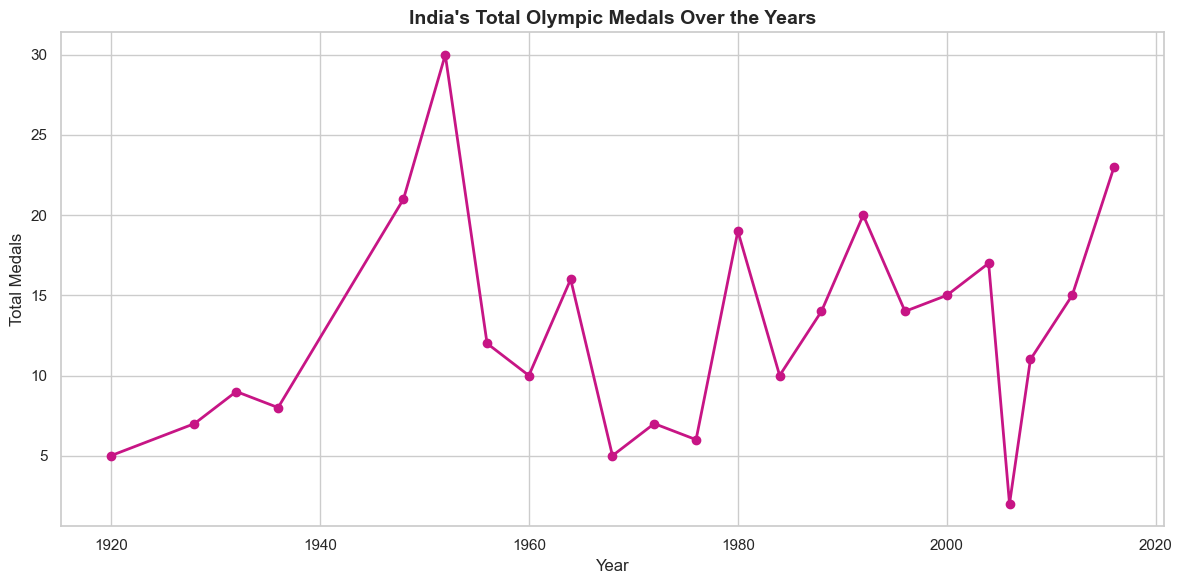

In [34]:
india_df = df[(df['Team'] == 'India') & (df['Medal'].notna())]
medals_by_year = india_df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(medals_by_year.index, medals_by_year.values, marker='o', color='mediumvioletred', linewidth=2)
plt.title("India's Total Olympic Medals Over the Years", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.tight_layout()
plt.show()


 ### **17. Height vs Weight of Athletes by Gender**

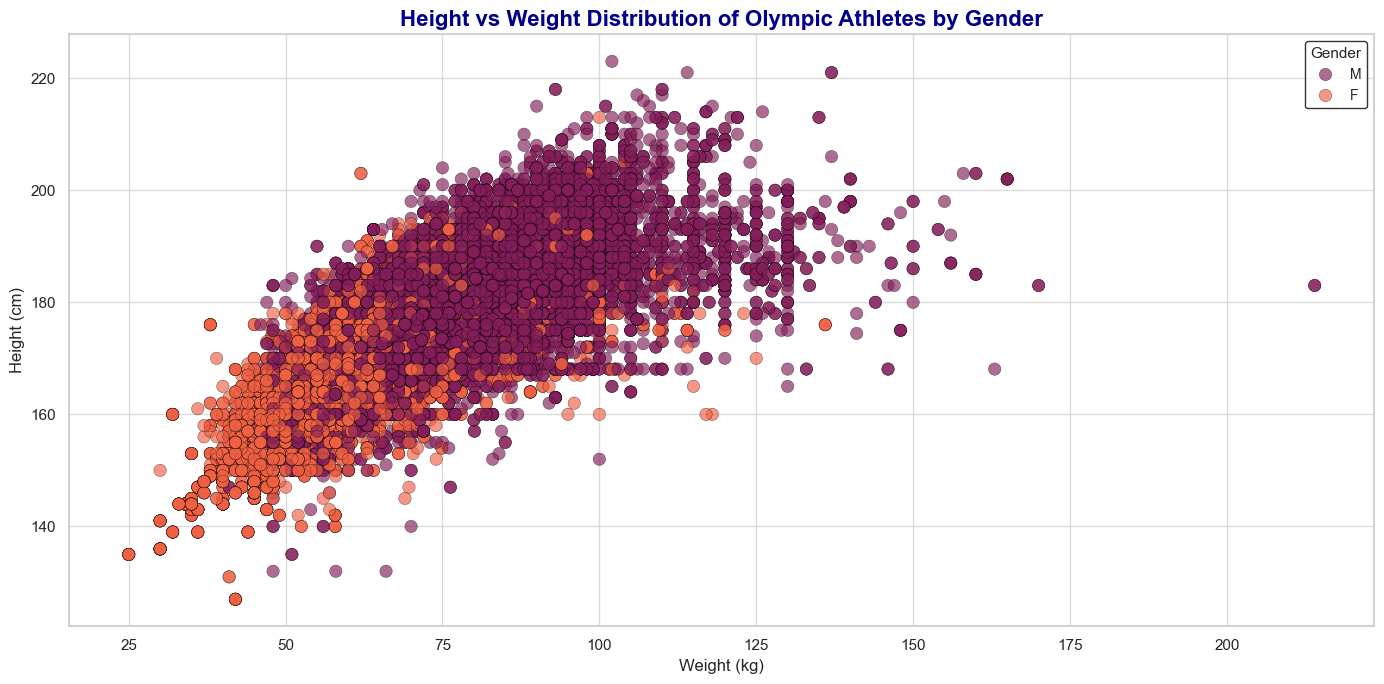

In [35]:
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")
sns.scatterplot(
    data=df,
    x='Weight',
    y='Height',
    hue='Sex',
    alpha=0.65,
    s=80,                       
    edgecolor='black',          
    linewidth=0.3,              
    palette='rocket'             
)
plt.title("Height vs Weight Distribution of Olympic Athletes by Gender", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Weight (kg)", fontsize=12)
plt.ylabel("Height (cm)", fontsize=12)
plt.grid(True, linestyle='-', alpha=0.7)
plt.legend(title="Gender", fontsize=10, title_fontsize=11, loc='upper right', frameon=True, facecolor='white', edgecolor='black')
plt.tight_layout()
plt.show()


### **18.Analyze how participation has changed over time (number of athletes per year)**

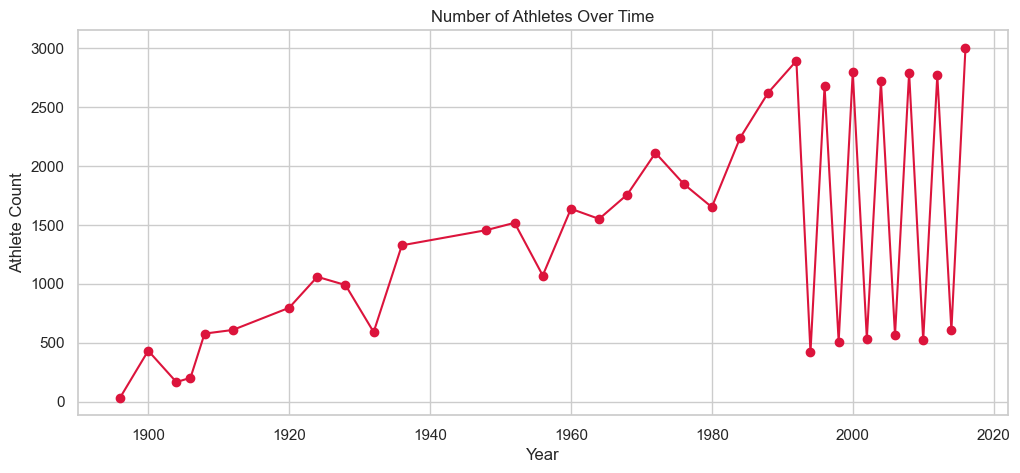

In [36]:
athletes_per_year = df.groupby('Year')['ID'].nunique()
athletes_per_year.plot(kind='line', marker='o', figsize=(12,5), title='Number of Athletes Over Time',color='crimson')
plt.ylabel('Athlete Count')
plt.grid(True, linestyle='-')

plt.show()


**19.Number of events held per year**

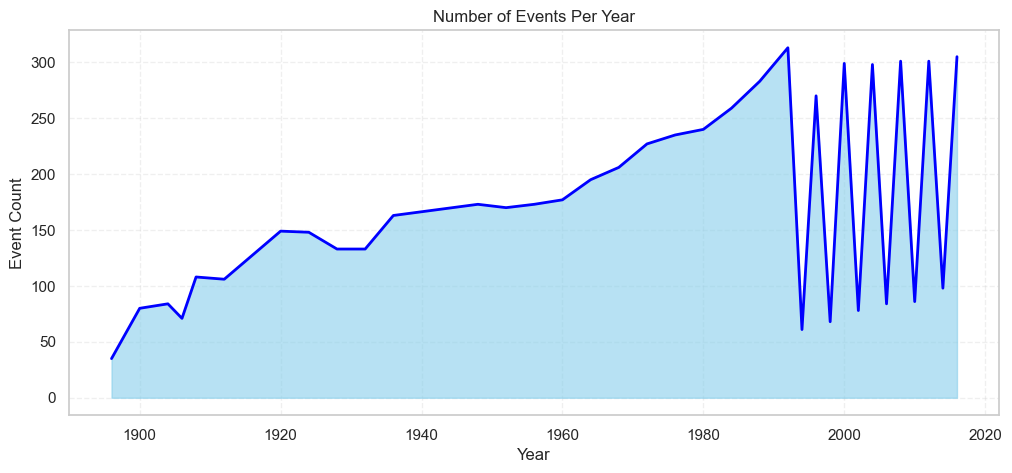

In [37]:
events_per_year = df.groupby('Year')['Event'].nunique()
plt.figure(figsize=(12, 5))
plt.fill_between(events_per_year.index, events_per_year.values, color='skyblue', alpha=0.6)
plt.plot(events_per_year.index, events_per_year.values, color='blue', linewidth=2)
plt.title('Number of Events Per Year')
plt.xlabel('Year')
plt.ylabel('Event Count')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


### 20. ** Height Distribution by Sport and Gender**

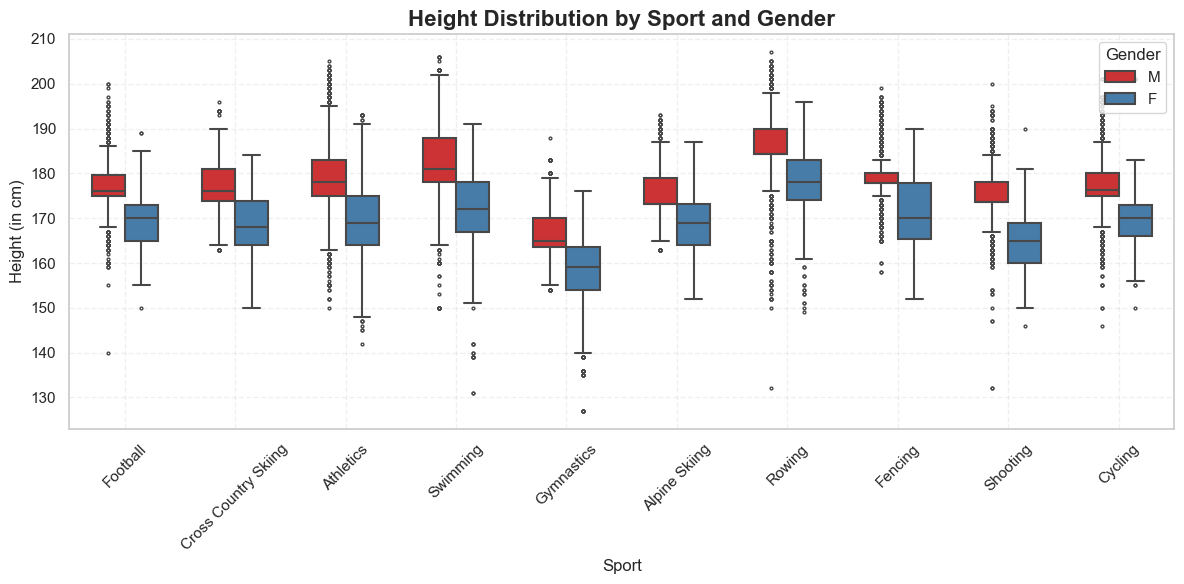

In [38]:

top_sports = df['Sport'].value_counts().head(10).index
plot_df = df[df['Sport'].isin(top_sports)][['Sport', 'Height', 'Sex']].dropna()

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", palette="pastel")

sns.boxplot(data=plot_df, x='Sport', y='Height', hue='Sex', palette='Set1', width=0.6, linewidth=1.5, fliersize=2)

plt.title('Height Distribution by Sport and Gender', fontsize=16, fontweight='bold')
plt.ylabel('Height (in cm)', fontsize=12)
plt.xlabel('Sport', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


### **Data Visualization**

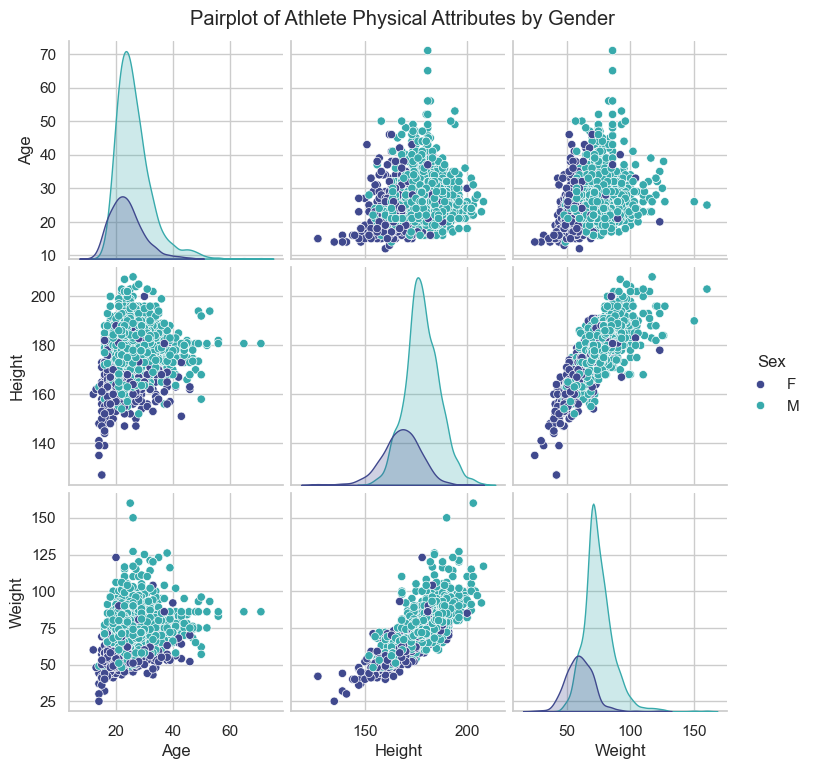

In [77]:
sample_df = df[['Age', 'Height', 'Weight', 'Sex']].dropna().sample(n=2000, random_state=42)
sns.pairplot(sample_df, hue='Sex', palette='mako')
plt.suptitle("Pairplot of Athlete Physical Attributes by Gender", y=1.02)
plt.show()


### **Outlier Detection and Analysis**

In [40]:
Q1 = df[['Age', 'Height', 'Weight']].quantile(0.25)
Q3 = df[['Age', 'Height', 'Weight']].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df[['Age', 'Height', 'Weight']] < (Q1 - 1.5 * IQR)) | 
                (df[['Age', 'Height', 'Weight']] > (Q3 + 1.5 * IQR)))

print("Number of Outliers (IQR method):")
print(outlier_mask.sum())


Number of Outliers (IQR method):
Age       3232
Height    1885
Weight    1586
dtype: int64


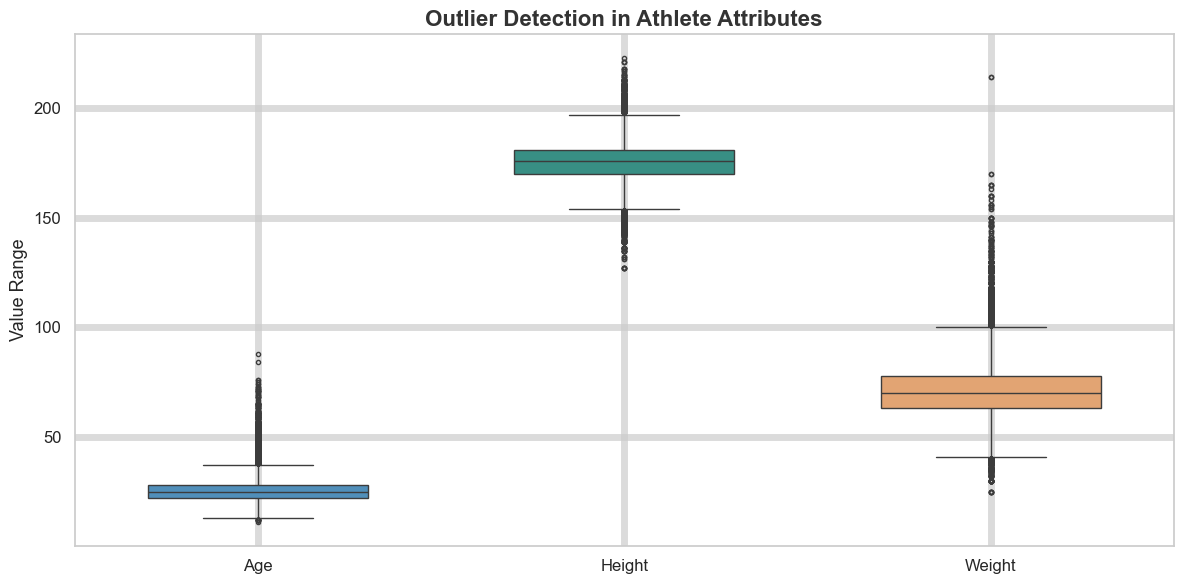

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
palette = ["#3E92CC", "#2A9D8F", "#F4A261"]  
sns.boxplot(data=df[['Age', 'Height', 'Weight']], palette=palette, width=0.6, fliersize=3)

plt.title('Outlier Detection in Athlete Attributes', fontsize=16, weight='bold', color='#333')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Value Range', fontsize=13)
plt.grid( linestyle='-', linewidth=5, alpha=0.7)
plt.tight_layout()
plt.show()


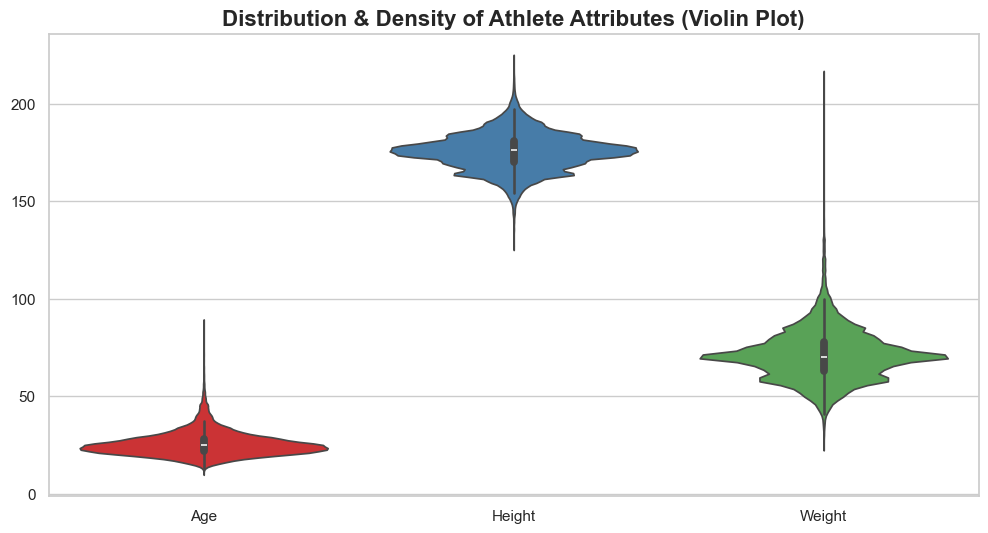

In [82]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df[['Age', 'Height', 'Weight']], palette="Set1")
plt.title('Distribution & Density of Athlete Attributes (Violin Plot)',fontsize=16, weight='bold')
plt.show()

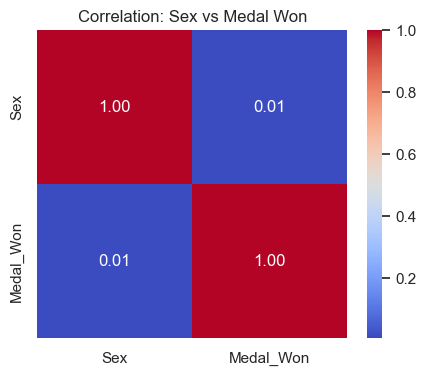

In [83]:

df_corr = df.copy()
df_corr['Sex'] = df_corr['Sex'].map({'M': 0, 'F': 1})
df_corr['Medal_Won'] = df_corr['Medal'].apply(lambda x: 0 if x == 'No Medal' else 1)
correlation = df_corr[['Sex', 'Medal_Won']].corr()
plt.figure(figsize=(5,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation: Sex vs Medal Won')
plt.show()

### **Atheletes with Multiple medals in one Olympics**


In [ ]:
multi_medalists = medals_df.groupby(['Name', 'Year'])['Medal'].count()
multi_medalists = multi_medalists[multi_medalists > 1]
print("\n--- Athletes with Multiple Medals in One Olympics ---")
print(multi_medalists.sort_values(ascending=False).head(10))


--- Athletes with Multiple Medals in One Olympics ---
Name                             Year
Aleksandr Nikolayevich Dityatin  1980    8
Nikolay Yefimovich Andrianov     1976    7
Matthew Nicholas "Matt" Biondi   1988    7
Viktor Ivanovych Chukarin        1952    6
Natalie Anne Coughlin (-Hall)    2008    6
Vra slavsk (-Odloilov)           1968    6
Burton Cecil Downing             1904    6
George Louis Eyser               1904    6
Alicia Jayne Coutts              2012    5
Simone Arianne Biles             2016    5
Name: Medal, dtype: int64
